**ASSIGNMENT 2**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

***DATA*** ***LOADING***

In [2]:
df = pd.read_csv('House Price India.csv')
df.head()

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
0,6762810145,42491,5,2.50,3650,9050,2.0,0,4,5,...,1921,0,122003,52.8645,-114.557,2880,5400,2,58,2380000
1,6762810635,42491,4,2.50,2920,4000,1.5,0,0,5,...,1909,0,122004,52.8878,-114.470,2470,4000,2,51,1400000
2,6762810998,42491,5,2.75,2910,9480,1.5,0,0,3,...,1939,0,122004,52.8852,-114.468,2940,6600,1,53,1200000
3,6762812605,42491,4,2.50,3310,42998,2.0,0,0,3,...,2001,0,122005,52.9532,-114.321,3350,42847,3,76,838000
4,6762812919,42491,3,2.00,2710,4500,1.5,0,0,4,...,1929,0,122006,52.9047,-114.485,2060,4500,1,51,805000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14620 entries, 0 to 14619
Data columns (total 23 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     14620 non-null  int64  
 1   Date                                   14620 non-null  int64  
 2   number of bedrooms                     14620 non-null  int64  
 3   number of bathrooms                    14620 non-null  float64
 4   living area                            14620 non-null  int64  
 5   lot area                               14620 non-null  int64  
 6   number of floors                       14620 non-null  float64
 7   waterfront present                     14620 non-null  int64  
 8   number of views                        14620 non-null  int64  
 9   condition of the house                 14620 non-null  int64  
 10  grade of the house                     14620 non-null  int64  
 11  Ar

In [4]:
df.columns

Index(['id', 'Date', 'number of bedrooms', 'number of bathrooms',
       'living area', 'lot area', 'number of floors', 'waterfront present',
       'number of views', 'condition of the house', 'grade of the house',
       'Area of the house(excluding basement)', 'Area of the basement',
       'Built Year', 'Renovation Year', 'Postal Code', 'Lattitude',
       'Longitude', 'living_area_renov', 'lot_area_renov',
       'Number of schools nearby', 'Distance from the airport', 'Price'],
      dtype='object')

In [5]:
df.shape

(14620, 23)

***DATA*** ***VISUALIZATION***

UNIVARIATE ANALYSIS

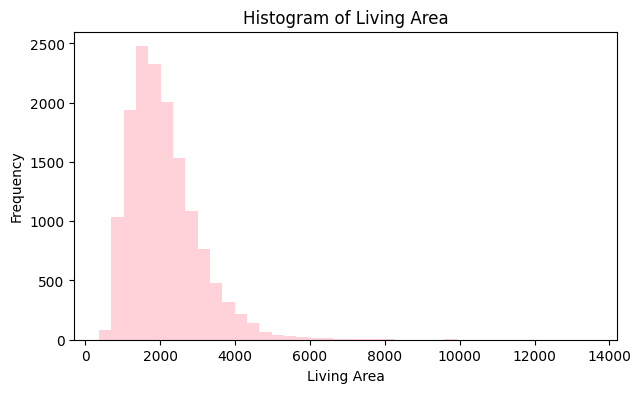

In [21]:
plt.figure(figsize=(7, 4))
plt.hist(df['living area'], bins=40, color='pink', alpha=0.7)
plt.xlabel('Living Area')
plt.ylabel('Frequency')
plt.title('Histogram of Living Area')
plt.show()

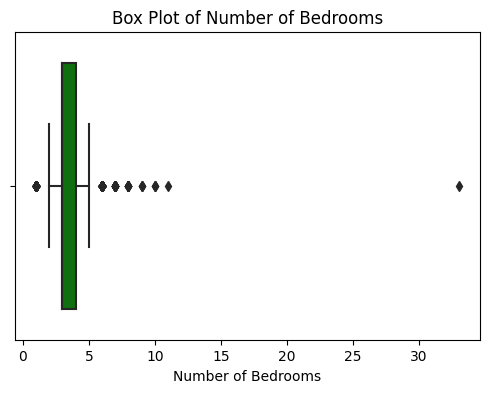

In [102]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='number of bedrooms', data=df, color='green')
plt.xlabel('Number of Bedrooms')
plt.title('Box Plot of Number of Bedrooms')
plt.show()

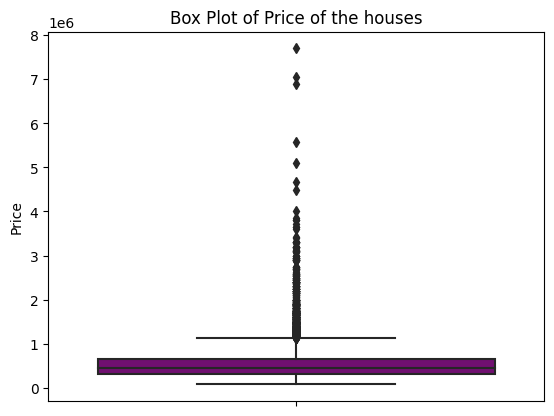

In [100]:
sns.boxplot(y='Price', data=df, color='purple')
plt.ylabel('Price')
plt.title('Box Plot of Price of the houses')
plt.show()

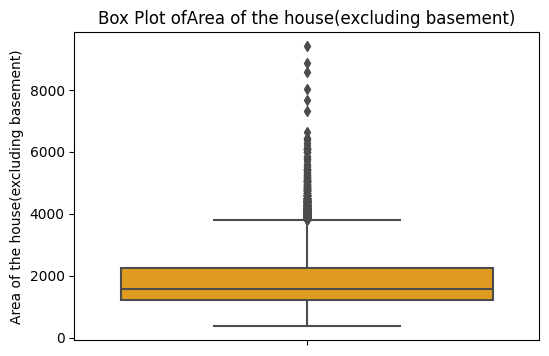

In [103]:
plt.figure(figsize=(6, 4))
sns.boxplot(y='Area of the house(excluding basement)', data=df, color='orange')
plt.ylabel('Area of the house(excluding basement)')
plt.title('Box Plot ofArea of the house(excluding basement)')
plt.show()

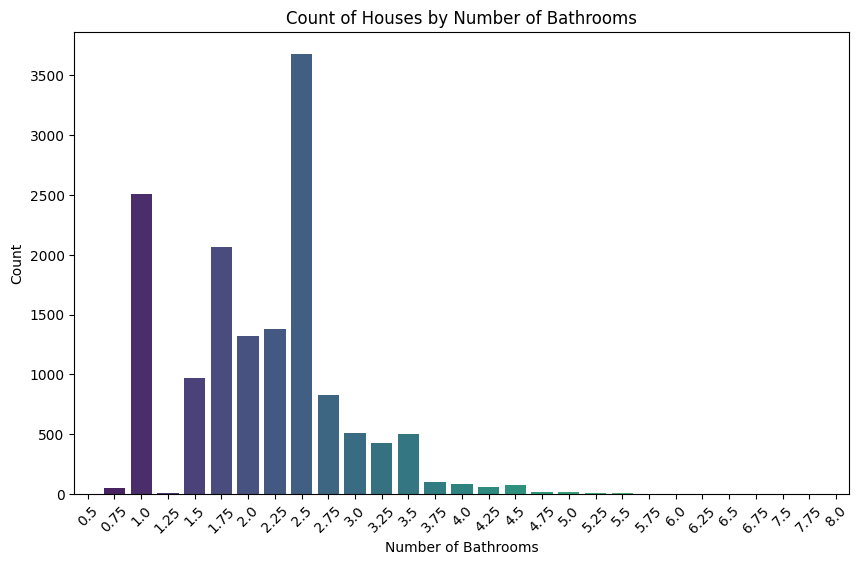

In [19]:
plt.figure(figsize=(10, 6))
sns.countplot(x='number of bathrooms', data=df, palette='viridis')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Count')
plt.title('Count of Houses by Number of Bathrooms')
plt.xticks(rotation=45)
plt.show()

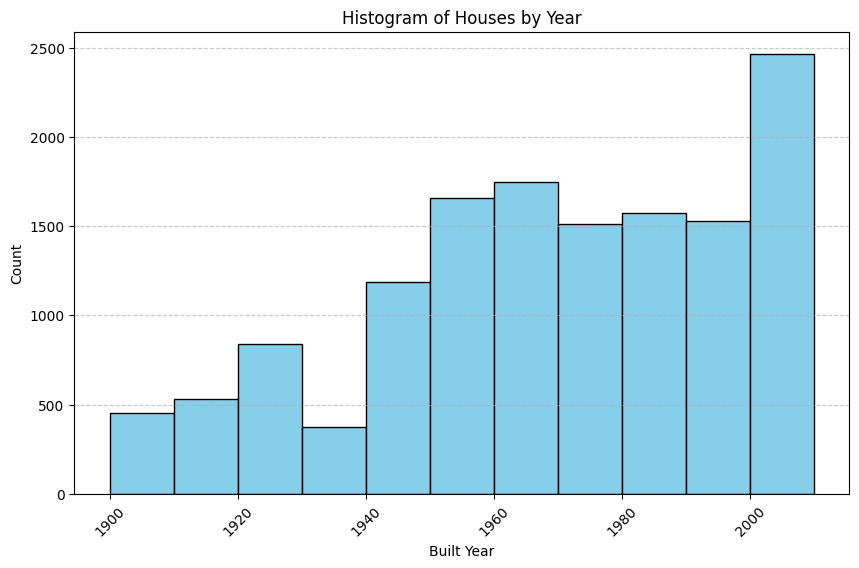

In [68]:
plt.figure(figsize=(10, 6))

bins = range(df['Built Year'].min(), df['Built Year'].max() + 1, 10)

plt.hist(df['Built Year'], bins=bins, color='skyblue', edgecolor='black')
plt.xlabel('Built Year')
plt.ylabel('Count')
plt.title('Histogram of Houses by Year')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

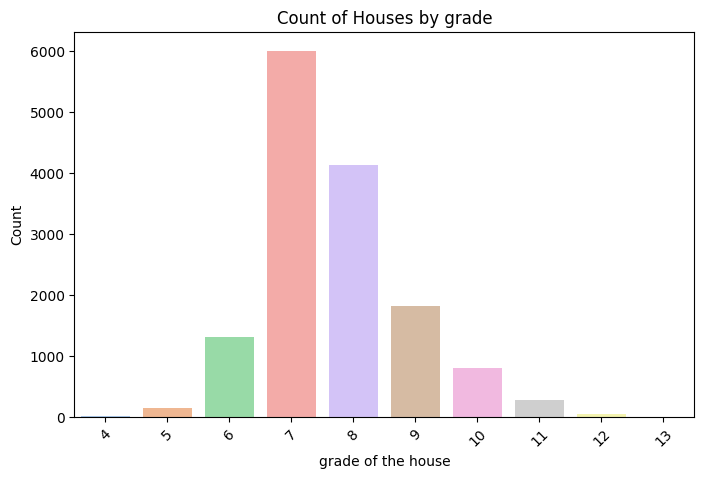

In [26]:
plt.figure(figsize=(8, 5))
sns.countplot(x='grade of the house', data=df, palette='pastel')
plt.xlabel('grade of the house')
plt.ylabel('Count')
plt.title('Count of Houses by grade')
plt.xticks(rotation=45)
plt.show()

In [52]:
df['grade of the house'].value_counts()

7     6011
8     4137
9     1828
6     1324
10     804
11     280
5      154
12      55
4       17
13      10
Name: grade of the house, dtype: int64

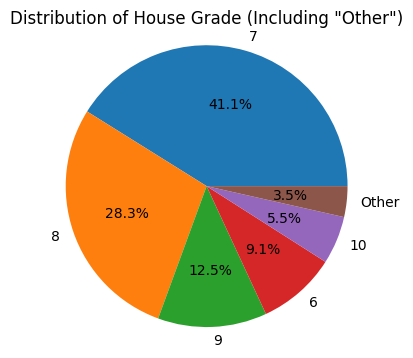

In [65]:
condition_counts = df['grade of the house'].value_counts()

total_count = len(df)

threshold = 0.02  
filtered_condition_counts = condition_counts[condition_counts / total_count >= threshold]
filtered_condition_counts['Other'] = condition_counts[condition_counts / total_count < threshold].sum()


plt.figure(figsize=(4, 4))
plt.pie(filtered_condition_counts, labels=filtered_condition_counts.index, autopct='%1.1f%%')
plt.title('Distribution of House Grade (Including "Other")')
plt.axis('equal')

plt.show()


BIVARIATE ANALYSIS

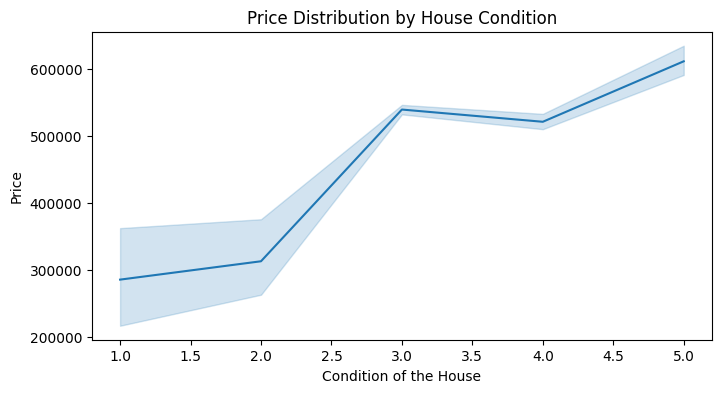

In [38]:
plt.figure(figsize=(8, 4))
sns.lineplot(x='condition of the house', y='Price', data=df)
plt.xlabel('Condition of the House')
plt.ylabel('Price')
plt.title('Price Distribution by House Condition')
plt.show()

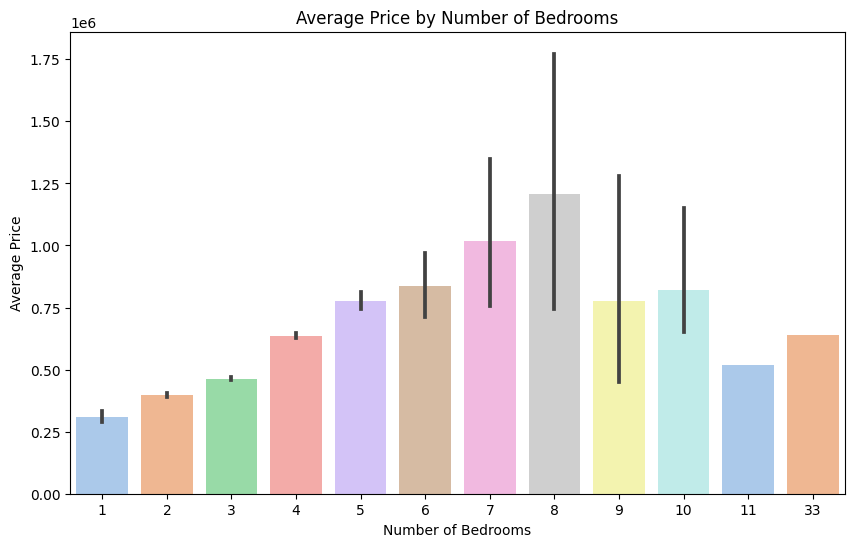

In [35]:
plt.figure(figsize=(10, 6))
sns.barplot(x='number of bedrooms', y='Price', data=df, palette='pastel')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Average Price')
plt.title('Average Price by Number of Bedrooms')
plt.show()

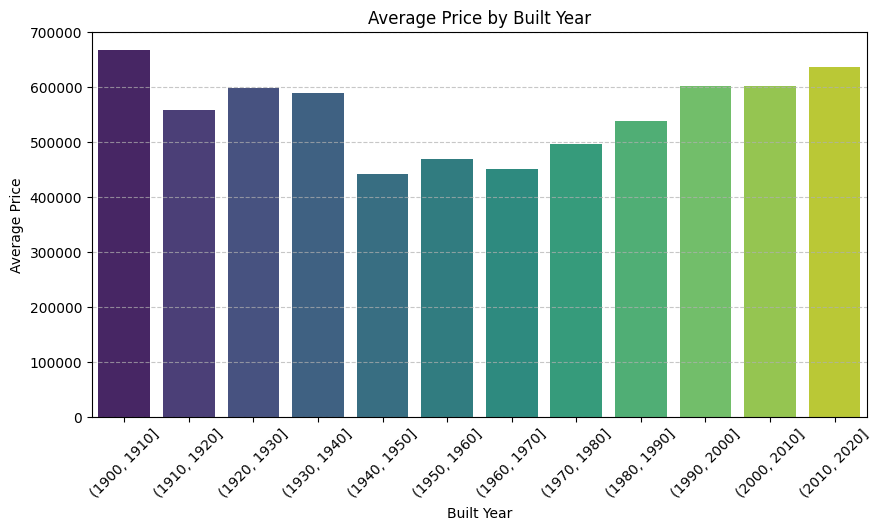

In [77]:
bin_width = 10
min_year = df['Built Year'].min()
max_year = df['Built Year'].max()
bins = np.arange(min_year, max_year + bin_width, bin_width)

price_by_year = df.groupby(pd.cut(df['Built Year'], bins=bins))['Price'].mean()

# Create a bar plot
plt.figure(figsize=(10, 5))
sns.barplot(x=price_by_year.index.astype(str), y=price_by_year.values, palette='viridis')
plt.xlabel('Built Year')
plt.ylabel('Average Price')
plt.title('Average Price by Built Year')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



MULTIVARIATE ANALYSIS

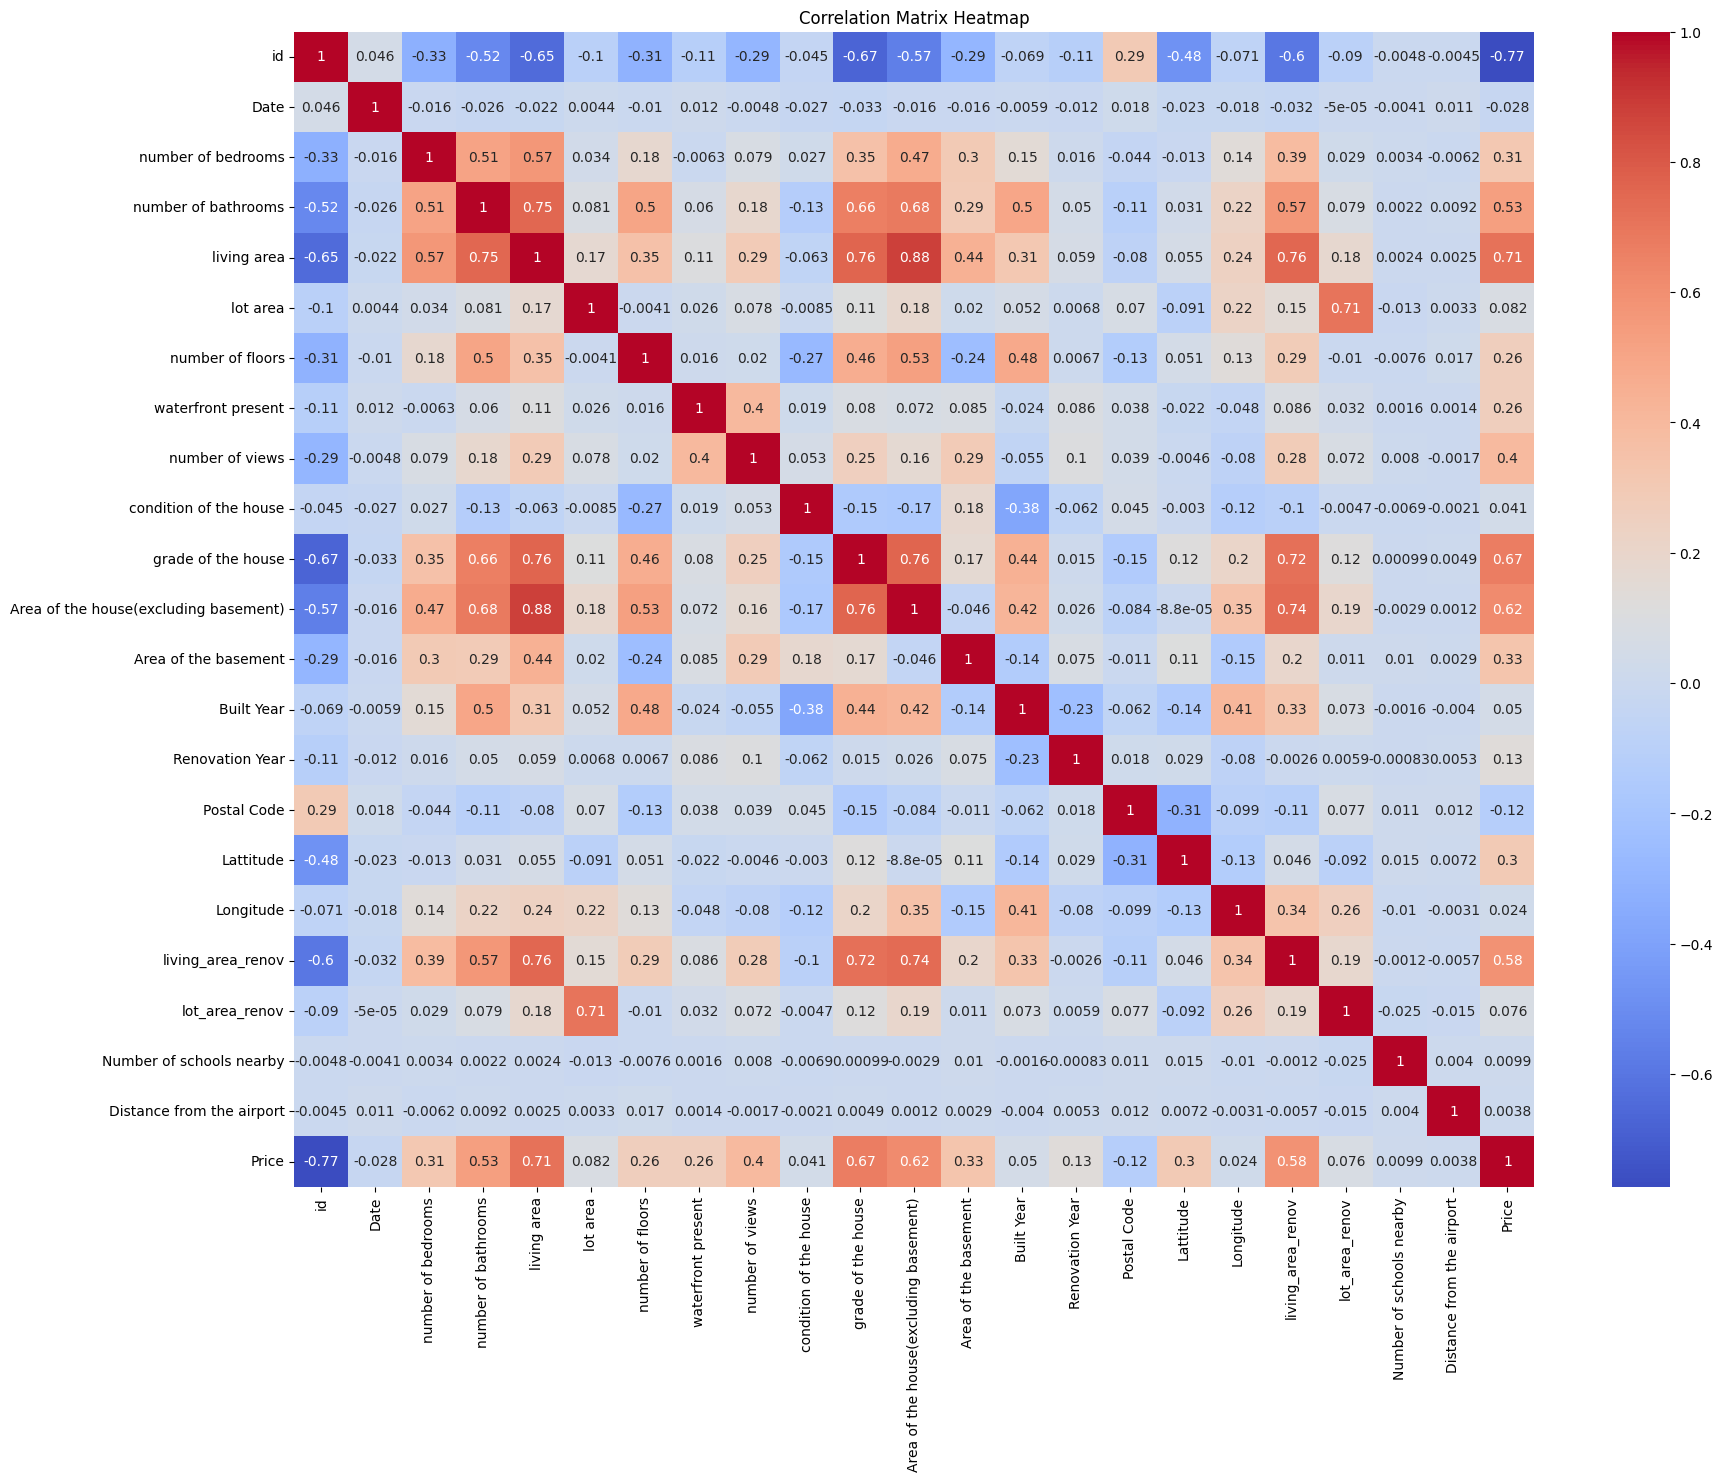

In [80]:
correlation_matrix = df.corr()
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

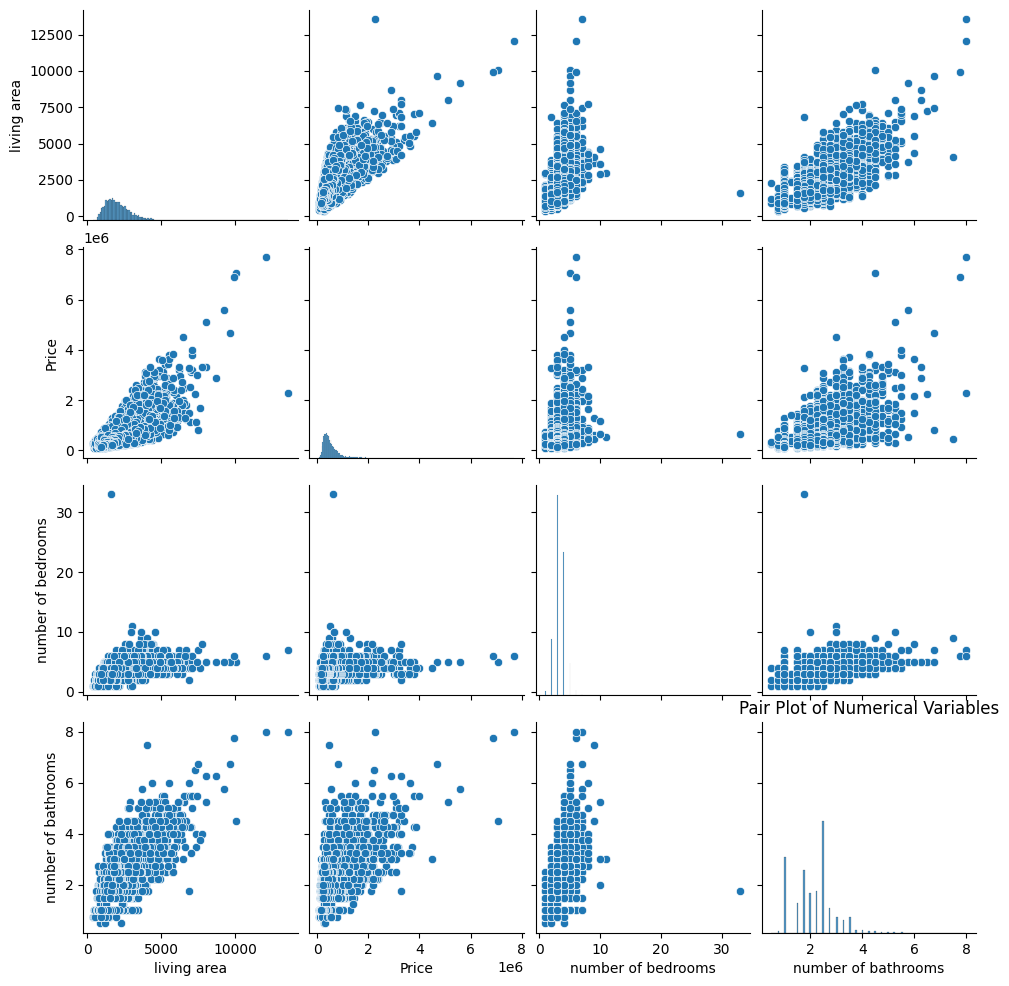

In [81]:
import seaborn as sns
sns.pairplot(df[['living area', 'Price', 'number of bedrooms', 'number of bathrooms']])
plt.title('Pair Plot of Numerical Variables')
plt.show()

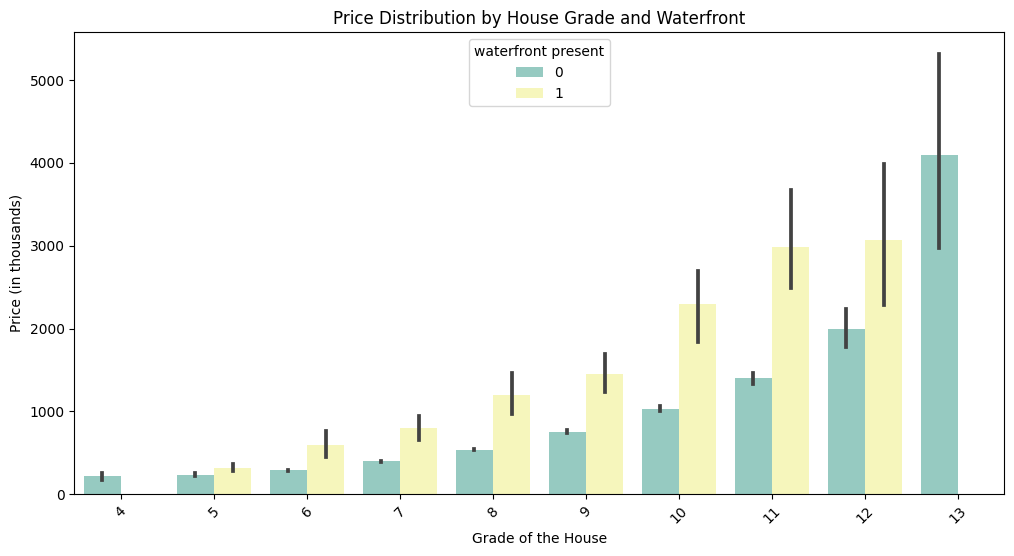

In [90]:
df['Price (k)'] = df['Price'] / 1000

plt.figure(figsize=(12, 6))
sns.barplot(x='grade of the house', y='Price (k)', hue='waterfront present', data=df, palette='Set3')
plt.xlabel('Grade of the House')
plt.ylabel('Price (in thousands)')
plt.title('Price Distribution by House Grade and Waterfront')
plt.xticks(rotation=45)
plt.show()

***DISCRIPTIVE STATISTICS***

In [95]:
df.describe()


,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price,Price (k)
count,1.462000e+04,14620.000000,14620.000000,14620.000000,14620.000000,1.462000e+04,14620.000000,14620.000000,14620.000000,14620.000000,...,14620.000000,14620.000000,14620.000000,14620.000000,14620.000000,14620.000000,14620.000000,14620.000000,1.462000e+04,14620.000000
mean,6.762821e+09,42604.538646,3.379343,2.129583,2098.262996,1.509328e+04,1.502360,0.007661,0.233105,3.430506,...,90.924008,122033.062244,52.792848,-114.404007,1996.702257,12753.500068,2.012244,64.950958,5.389322e+05,538.932218
std,6.237575e+03,67.347991,0.938719,0.769934,928.275721,3.791962e+04,0.540239,0.087193,0.766259,0.664151,...,416.216661,19.082418,0.137522,0.141326,691.093366,26058.414467,0.817284,8.936008,3.675324e+05,367.532381
min,6.762810e+09,42491.000000,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,...,0.000000,122003.000000,52.385900,-114.709000,460.000000,651.000000,1.000000,50.000000,7.800000e+04,78.000000
25%,6.762815e+09,42546.000000,3.000000,1.750000,1440.000000,5.010750e+03,1.000000,0.000000,0.000000,3.000000,...,0.000000,122017.000000,52.707600,-114.519000,1490.000000,5097.750000,1.000000,57.000000,3.200000e+05,320.000000
50%,6.762821e+09,42600.000000,3.000000,2.250000,1930.000000,7.620000e+03,1.500000,0.000000,0.000000,3.000000,...,0.000000,122032.000000,52.806400,-114.421000,1850.000000,7620.000000,2.000000,65.000000,4.500000e+05,450.000000
75%,6.762826e+09,42662.000000,4.000000,2.500000,2570.000000,1.080000e+04,2.000000,0.000000,0.000000,4.000000,...,0.000000,122048.000000,52.908900,-114.315000,2380.000000,10125.000000,3.000000,73.000000,6.450000e+05,645.000000
max,6.762832e+09,42734.000000,33.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,...,2015.000000,122072.000000,53.007600,-113.505000,6110.000000,560617.000000,3.000000,80.000000,7.700000e+06,7700.000000


***Handling Missing Values***

In [97]:
df.isnull().any()

id                                       False
Date                                     False
number of bedrooms                       False
number of bathrooms                      False
living area                              False
lot area                                 False
number of floors                         False
waterfront present                       False
number of views                          False
condition of the house                   False
grade of the house                       False
Area of the house(excluding basement)    False
Area of the basement                     False
Built Year                               False
Renovation Year                          False
Postal Code                              False
Lattitude                                False
Longitude                                False
living_area_renov                        False
lot_area_renov                           False
Number of schools nearby                 False
Distance from

In [98]:
df.isnull().sum()

id                                       0
Date                                     0
number of bedrooms                       0
number of bathrooms                      0
living area                              0
lot area                                 0
number of floors                         0
waterfront present                       0
number of views                          0
condition of the house                   0
grade of the house                       0
Area of the house(excluding basement)    0
Area of the basement                     0
Built Year                               0
Renovation Year                          0
Postal Code                              0
Lattitude                                0
Longitude                                0
living_area_renov                        0
lot_area_renov                           0
Number of schools nearby                 0
Distance from the airport                0
Price                                    0
Price (k)  

no null values are present in the dataset